# 使用LogisticRegression对数据集中的10个样本实现分类

In [1]:
from task1 import load_data,dataSplit
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

准备数据

In [3]:
# 加载数据
data ,fea, gnd = load_data()

模型训练以及结果显示

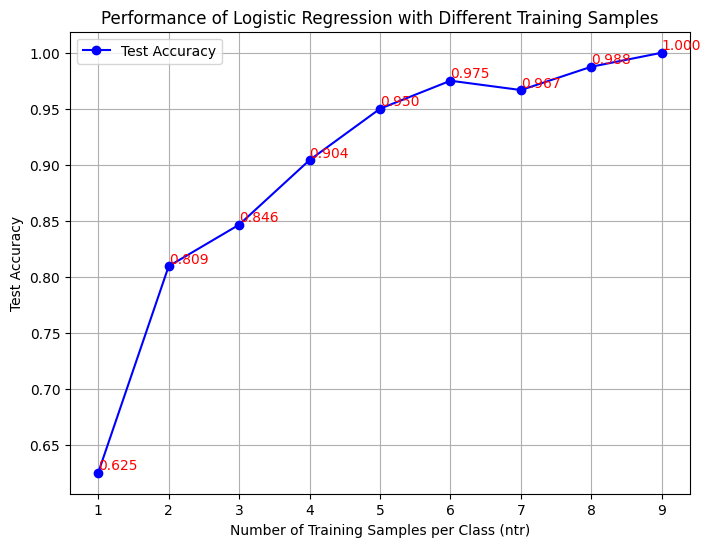

In [4]:
# 自定义 ntr 值
ntr_values = [1,2,3,4, 5, 6, 7, 8, 9]
accuracies = []
for ntr in ntr_values:
    # 数据划分
    trainData, trainGnd, testData, testGnd = dataSplit(fea, gnd, ntr)
    # 逻辑斯蒂回归模型
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
    model.fit(trainData, trainGnd.ravel())  # 训练模型
    # 测试集预测
    predictions = model.predict(testData)
    # 计算准确率
    accuracy = accuracy_score(testGnd, predictions)
    accuracies.append(accuracy)

# 绘制结果
plt.figure(figsize=(8, 6))
plt.plot(ntr_values, accuracies, marker='o', color='b', label='Test Accuracy')
for x, y in zip(ntr_values, accuracies):
    plt.text(x, y, f'{y:.3f}', ha='left', va='bottom', color='r')
plt.title('Performance of Logistic Regression with Different Training Samples')
plt.xlabel('Number of Training Samples per Class (ntr)')
plt.ylabel('Test Accuracy')
plt.grid()
plt.legend()
plt.show()